This dataset contains US national hate crime data from 1991-2020. 

Download Link: https://crime-data-explorer.fr.cloud.gov/pages/downloads

Scroll down to "additional datasets" until you find "hate crime", then click on download. The zip file should contain a csv file. 

Question 1: Has black hate crime violence gone down since 1991 or increased, assuming purely anti-black sentiment (ignoring just overtly racist people to many races)?

Question 2: Has COVID-19 had a significant impact on hate crime rates for Asian Americans, assuming purely anti-asian sentiment (ignoring just overtly racist people to many races)?

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
df = pd.read_csv('hate_crime.csv')
df

C:\Users\james\AppData\Local\Temp\ipykernel_36404\3083370921.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hate_crime.csv')


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,1318026,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,2,Intimidation,2.0,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S
219573,1142103,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government,S,S
219574,1318018,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Black or African American,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S
219575,1318022,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S


In [179]:
df.describe()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,2.195770e+05,219577.000000,51411.000000,49539.000000,219577.000000,47130.000000,47123.000000,219577.000000,216098.000000
mean,2.080389e+05,2005.472691,0.658867,0.085327,0.955724,0.548207,0.099081,1.247567,0.984715
std,3.251394e+05,8.591466,1.238581,0.513304,1.358364,0.844695,0.482898,2.274116,1.173726
min,2.000000e+00,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.489600e+04,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.097900e+05,2005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.646850e+05,2013.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.358628e+06,2020.000000,146.000000,60.000000,99.000000,60.000000,20.000000,900.000000,147.000000


In [180]:
df['BIAS_DESC'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry',
       'Anti-Multiple Religions, Group', 'Anti-Multiple Races, Group',
       'Anti-Lesbian (Female)',
       'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
       'Anti-American Indian or Alaska Native',
       'Anti-Gay (Male);Anti-White',
       'Anti-Black or African American;Anti-Jewish',
       'Anti-Black or African American;Anti-Lesbian (Female)',
       'Anti-Black or African American;Anti-Gay (Male)',
       'Anti-Black or African American;Anti-White',
       'Anti-Atheism/Agnosticism', 'Anti-Gay (Male);Anti-Jewish',
       'Anti-Bisexual', 'Anti-Hispanic or Latino;Anti-White',
       'Anti-Hispanic or Latino;Anti-Multiple Races, Group',
       'Anti-Ame

In [181]:
d0 = df['DATA_YEAR'].unique()
d0

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [182]:
d1 = df[df['BIAS_DESC'] == 'Anti-Asian']
d1

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
43,33,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S
55,3010,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Unknown,NaN,1,Intimidation,1.0,Restaurant,Anti-Asian,Individual,S,S
63,51,1991,CA0300900,Garden Grove,NaN,City,CA,California,Pacific,West,...,White,NaN,2,Aggravated Assault,2.0,Parking/Drop Lot/Garage,Anti-Asian,Individual,S,S
71,77,1991,CO0010100,Aurora,NaN,City,CO,Colorado,Mountain,West,...,White,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Asian,Individual,S,S
116,95,1991,CO0031200,Chatfield State Park,NaN,Other State Agency,CO,Colorado,Mountain,West,...,White,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Other/Unknown,Anti-Asian,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219258,1337705,2020,WASPD0000,Seattle,NaN,City,WA,Washington,Pacific,West,...,Unknown,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
219319,1337899,2020,WASPD0000,Seattle,NaN,City,WA,Washington,Pacific,West,...,Unknown,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
219342,1331508,2020,WI0130100,Madison,NaN,City,WI,Wisconsin,East North Central,Midwest,...,White,Unknown,2,Simple Assault,2.0,Residence/Home,Anti-Asian,Individual,S,S
219359,1331485,2020,WI0130800,University of Wisconsin:,Madison,University or College,WI,Wisconsin,East North Central,Midwest,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,School-College/University,Anti-Asian,Business,S,S


In [183]:
d2 = df[df['BIAS_DESC'] == 'Anti-Black or African American']
d2

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
11,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
12,2,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Unknown,NaN,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
15,5,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219561,956213,2020,WY0010100,Laramie,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
219563,890498,2020,WY0110100,Cheyenne,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
219567,705009,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Park/Playground,Anti-Black or African American,Individual,S,S
219569,1009279,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,2,Aggravated Assault,2.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S


In [184]:
d3 = df[df['BIAS_DESC'] == 'Anti-White']
d3

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
5,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S
6,3019,1991,AR0600200,Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,School/College,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219537,1349518,2020,WVWSP0100,State Police:,Beckley,State Police,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Drug/Narcotic Violations,0.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Society/Public,S,S
219545,1283286,2020,WVWSP2200,State Police:,Lewisburg,State Police,WV,West Virginia,South Atlantic,South,...,Unknown,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-White,Individual,S,S
219556,1283308,2020,WVWSP5200,State Police:,Wayne,State Police,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,All Other Larceny,0.0,Specialty Store,Anti-White,Business,S,S
219573,1142103,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government,S,S


In [185]:
d1 = df[df['BIAS_DESC'] == 'Anti-Asian']
asianYearList = d1['DATA_YEAR'].values
asianVictimList = d1['VICTIM_COUNT'].values

d2 = df[df['BIAS_DESC'] == 'Anti-Black or African American']
blackYearList = d2['DATA_YEAR'].values
blackVictimList = d2['VICTIM_COUNT'].values

d3 = df[df['BIAS_DESC'] == 'Anti-White']
whiteYearList = d3['DATA_YEAR'].values
whiteVictimList = d3['VICTIM_COUNT'].values

In [186]:
asianYearToVictim = {}

for year in d0:
    asianYearToVictim[year] = 0

for i in range(len(asianYearList)):
    asianYearToVictim[asianYearList[i]] += asianVictimList[i]

asianYearToVictim.values()

dict_values([341, 290, 319, 280, 496, 544, 465, 375, 385, 338, 363, 282, 293, 274, 253, 243, 236, 179, 150, 203, 174, 168, 163, 200, 139, 137, 161, 178, 246, 485])

In [187]:
blackYearToVictim = {}

for year in d0:
    blackYearToVictim[year] = 0

for i in range(len(blackYearList)):
    blackYearToVictim[blackYearList[i]] += blackVictimList[i]

blackYearToVictim.values()

dict_values([2066, 2968, 3569, 2746, 3945, 4603, 3984, 3783, 3715, 3613, 3745, 3102, 3176, 3499, 3365, 3311, 3458, 3688, 2919, 2766, 2647, 2588, 2440, 2053, 2228, 2256, 2497, 2417, 2641, 4615])

In [188]:
whiteYearToVictim = {}

for year in d0:
    whiteYearToVictim[year] = 0

for i in range(len(whiteYearList)):
    whiteYearToVictim[whiteYearList[i]] += whiteVictimList[i]

whiteYearToVictim.values()

dict_values([1096, 1736, 1854, 1317, 1556, 1445, 1313, 1017, 1003, 1118, 996, 896, 1021, 1027, 964, 1023, 900, 876, 660, 699, 616, 798, 771, 753, 791, 931, 833, 1049, 787, 1431])

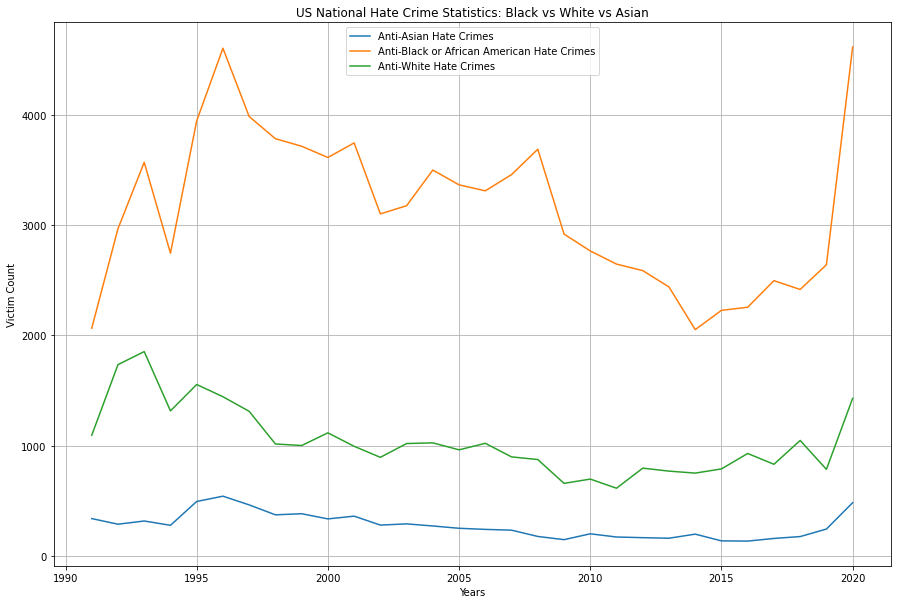

In [189]:
plt.figure(figsize=(15,10))

bias = 'Anti-Asian Hate Crimes'
plt.plot(asianYearToVictim.keys(), asianYearToVictim.values(), label=bias)

bias = 'Anti-Black or African American Hate Crimes'
plt.plot(blackYearToVictim.keys(), blackYearToVictim.values(), label=bias)

bias = 'Anti-White Hate Crimes'
plt.plot(whiteYearToVictim.keys(), whiteYearToVictim.values(), label=bias)

plt.title("US National Hate Crime Statistics: Black vs White vs Asian")
plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()

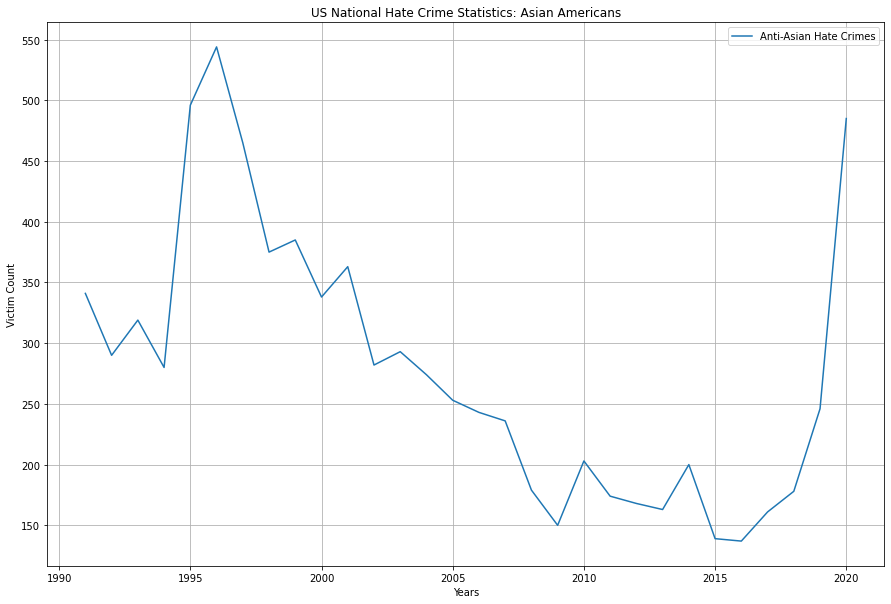

In [190]:
plt.figure(figsize=(15,10))

bias = 'Anti-Asian Hate Crimes'
plt.plot(asianYearToVictim.keys(), asianYearToVictim.values(), label=bias)
plt.title("US National Hate Crime Statistics: Asian Americans")

plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()

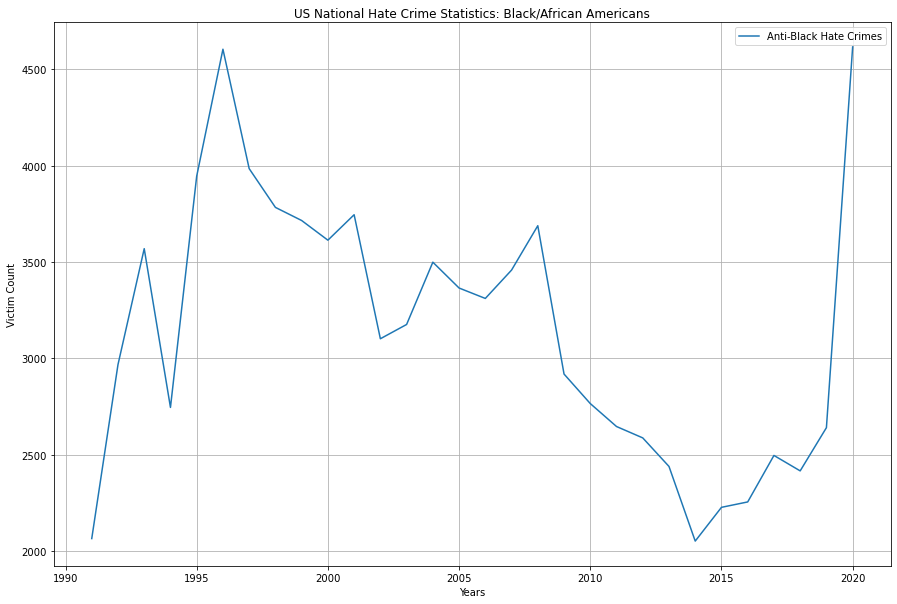

In [191]:
plt.figure(figsize=(15,10))

bias = 'Anti-Black Hate Crimes'
plt.plot(blackYearToVictim.keys(), blackYearToVictim.values(), label=bias)
plt.title("US National Hate Crime Statistics: Black/African Americans")

plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()

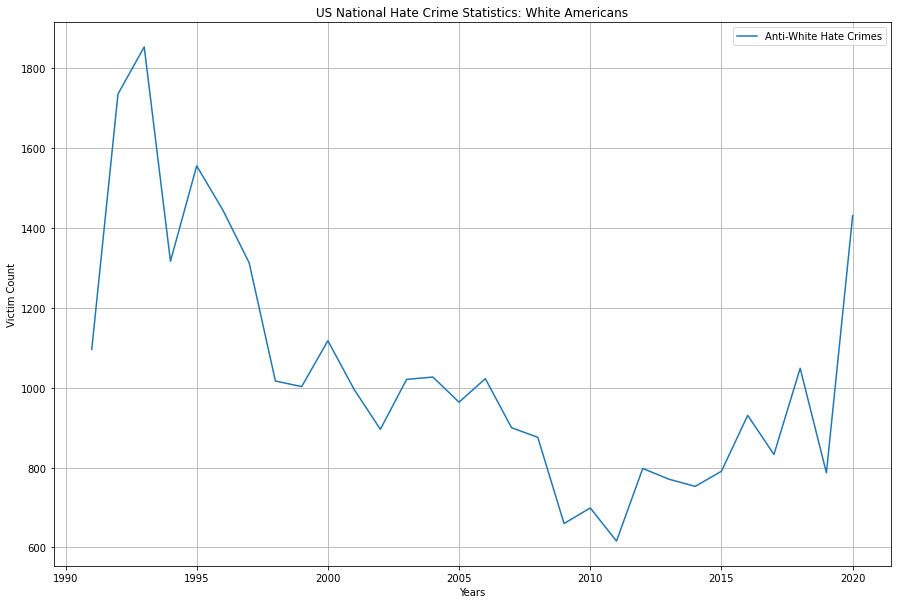

In [193]:
plt.figure(figsize=(15,10))

bias = 'Anti-White Hate Crimes'
plt.plot(whiteYearToVictim.keys(), whiteYearToVictim.values(), label=bias)
plt.title("US National Hate Crime Statistics: White Americans")

plt.ylabel("Victim Count")
plt.xlabel("Years")
plt.legend()
plt.grid()